In [131]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import scipy.stats as sps

In [132]:
# Load the data into data frames

df1 = pd.read_csv('anxiety_clean.csv')

In [133]:
# Data includes the effects of anxiety and various situations. Earning refers to family income, and ESA refers to the employment and support allowance for people who have lost the ability to work
# ICOME_SUPPORT is financial support for people who are unable to work, umployment_rate is the unemployment rate, house_afford affordability
# Earning_LLW refers to employees earning less than the London Living Wage (LLW)
# What's left is the percentage of the total for each occupation, to see how much anxiety affects each occupation

df1.head()

,Code,Area,Year,Anxiety,Earning,ESA,Icome_support,umployment_rate,house_afford,Earning_LLW,manager_occupation,skill_occupation,service_occupation,elementary_occupation
0,E09000002,Barking and Dagenham,2011,21.8600,11.7500,22.3800,7.3100,13.0000,7,16.1000,3.2000,2.2000,7.0000,4
1,E09000002,Barking and Dagenham,2012,23.8200,11.9800,34.9700,6.2400,13.5000,6,17.0000,9.4000,18.2000,4.0000,14
2,E09000002,Barking and Dagenham,2013,23.7100,11.8400,47.8300,4.7300,13.6000,6,16.2000,9.7000,22.8000,6.2000,14
3,E09000002,Barking and Dagenham,2014,21.0800,11.8800,59.1600,3.6200,10.7000,8,24.1000,12.8000,20.9000,3.9000,8
4,E09000002,Barking and Dagenham,2015,20.7800,11.8900,63.6300,2.9700,9.7000,8,25.0000,6.8000,24.4000,3.8000,15


In [134]:
X = df1[['Earning', 'ESA', 'Icome_support', 'umployment_rate', 'house_afford', 'Earning_LLW']]
X

,Earning,ESA,Icome_support,umployment_rate,house_afford,Earning_LLW
0,11.7500,22.3800,7.3100,13.0000,7,16.1000
1,11.9800,34.9700,6.2400,13.5000,6,17.0000
2,11.8400,47.8300,4.7300,13.6000,6,16.2000
3,11.8800,59.1600,3.6200,10.7000,8,24.1000
4,11.8900,63.6300,2.9700,9.7000,8,25.0000
5,11.9500,59.3700,2.7700,6.8000,10,27.7000
6,11.9700,56.5700,2.4300,7.7000,10,26.1000
7,12.5200,52.0100,2.1200,5.9000,10,25.8000
8,15.1800,13.9300,3.8100,8.0000,10,19.9000
9,14.7200,22.7900,3.0300,8.9000,10,22.7000


In [135]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [137]:
# After using VIF for multicollinearity processing, it is found that the new X_new has the same number of columns as the original X, so there is no multicollinearity (multicollinearity is not serious)

X_new = drop_column_using_vif_(X,5 )
X_new

,Earning,ESA,Icome_support,umployment_rate,house_afford,Earning_LLW
0,11.7500,22.3800,7.3100,13.0000,7,16.1000
1,11.9800,34.9700,6.2400,13.5000,6,17.0000
2,11.8400,47.8300,4.7300,13.6000,6,16.2000
3,11.8800,59.1600,3.6200,10.7000,8,24.1000
4,11.8900,63.6300,2.9700,9.7000,8,25.0000
5,11.9500,59.3700,2.7700,6.8000,10,27.7000
6,11.9700,56.5700,2.4300,7.7000,10,26.1000
7,12.5200,52.0100,2.1200,5.9000,10,25.8000
8,15.1800,13.9300,3.8100,8.0000,10,19.9000
9,14.7200,22.7900,3.0300,8.9000,10,22.7000


In [138]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 500) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [139]:
df = pd.read_csv('anxiety_clean.csv')

In [142]:
X = df[['Earning', 'ESA', 'Icome_support', 'umployment_rate', 'house_afford', 'Earning_LLW','manager_occupation','skill_occupation','service_occupation','elementary_occupation']]

Text(0.5, 1.0, 'Correlation Matrix')

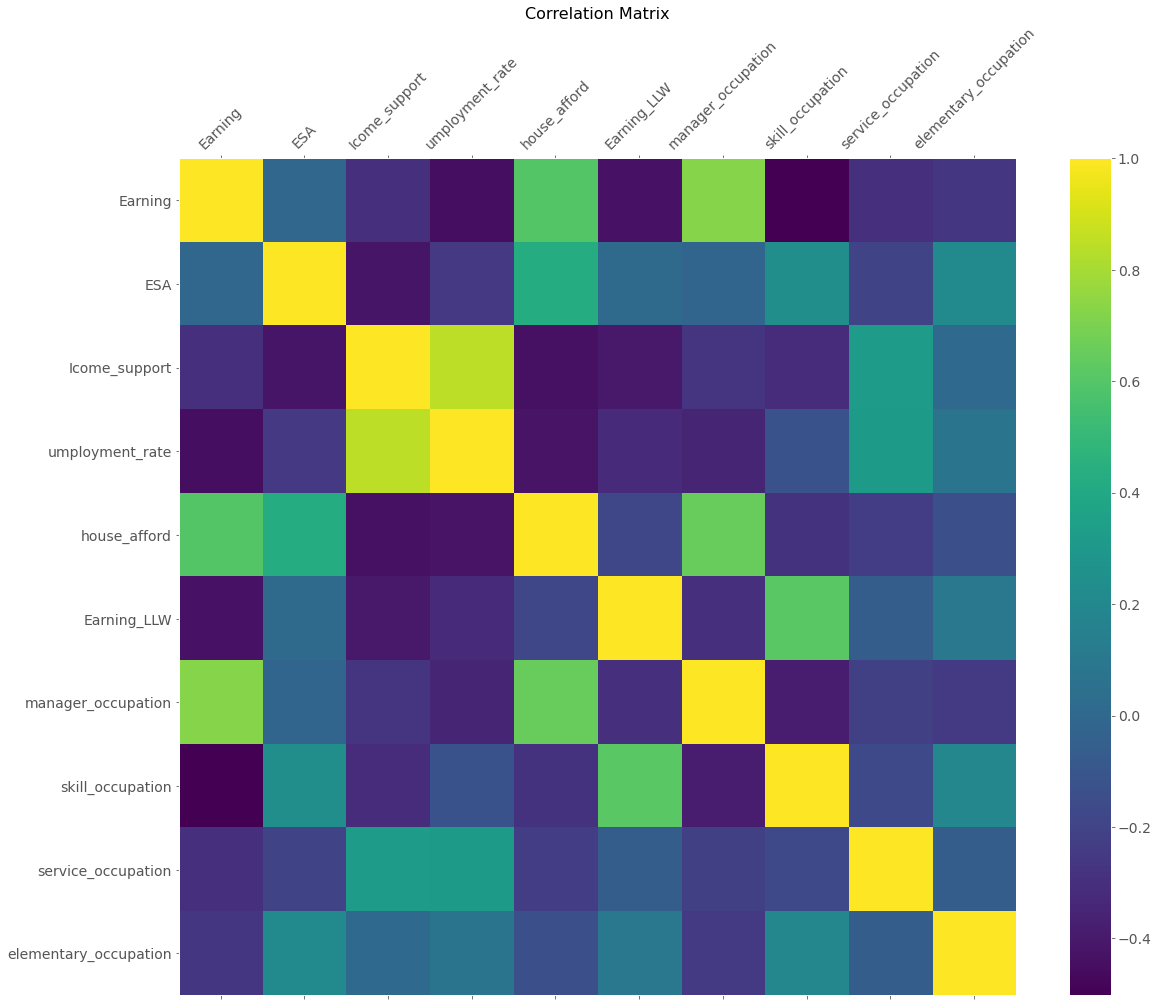

In [143]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(X.corr(), fignum=f.number)
plt.xticks(range(X.shape[1]), X.columns, fontsize=14, rotation=45)
plt.yticks(range(X.shape[1]), X.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

# Simple regression

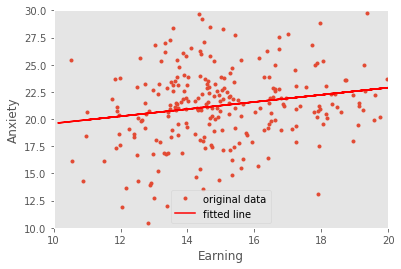

y = 0.329 x + 16.309
Rsq =  0.03962346290997349
p-value =  0.0013675472605214048


In [144]:
# This is a regression of Earning against Anxiety:

X = df1['Earning']
Y = df1['Anxiety']

plt.xlabel('Earning')
plt.ylabel('Anxiety')

a = plt.plot(X,Y,'.', label='original data')
plt.xlim(10,20)
plt.ylim(10,30)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

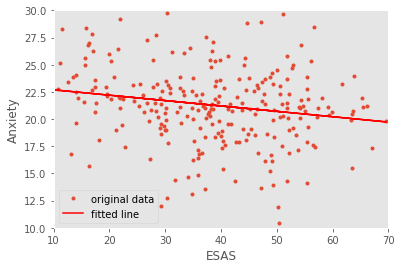

y = -0.05 x + 23.188
Rsq =  0.034465454020033766
p-value =  0.0028655230142302967


In [145]:
# This is a regression of ESA against Anxiety:

X = df1['ESA']
Y = df1['Anxiety']

plt.xlabel('ESAS')
plt.ylabel('Anxiety')

a = plt.plot(X,Y,'.', label='original data')
plt.xlim(10,70)
plt.ylim(10,30)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

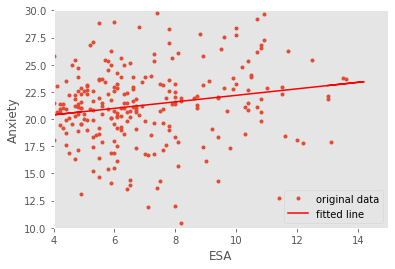

y = 0.299 x + 19.192
Rsq =  0.03606903951908998
p-value =  0.0022758948849186333


In [146]:
# This is a regression of umployment_rate against Anxiety:

X = df1['umployment_rate']
Y = df1['Anxiety']

plt.xlabel('ESA')
plt.ylabel('Anxiety')

a = plt.plot(X,Y,'.',label='original data')
plt.xlim(4,15)
plt.ylim(10,30)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

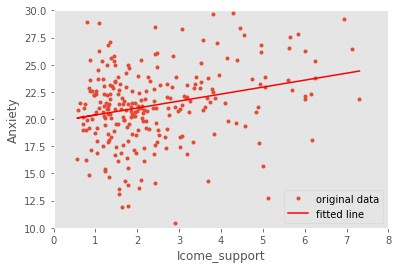

y = 0.641 x + 19.736
Rsq =  0.06620564099824222
p-value =  3.084971051397421e-05


In [147]:
# This is a regression of Icome_support against Anxiety:

X = df1['Icome_support']
Y = df1['Anxiety']

plt.xlabel('Icome_support')
plt.ylabel('Anxiety')

a = plt.plot(X,Y,'.',label='original data')
plt.xlim(0,8)
plt.ylim(10,30)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

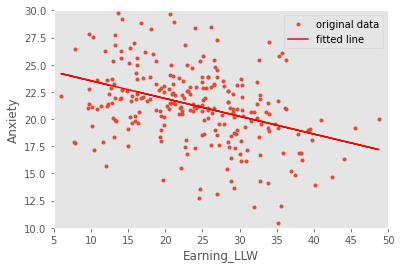

y = -0.164 x + 25.166
Rsq =  0.13893512819438514
p-value =  7.367127972920203e-10


In [149]:
# This is a regression of Earning_LLW against Anxiety:

X = df1['Earning_LLW']
Y = df1['Anxiety']

plt.xlabel('Earning_LLW')
plt.ylabel('Anxiety')

a = plt.plot(X,Y,'.',label='original data')
plt.xlim(5,50)
plt.ylim(10,30)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

# Multiple regression

In [150]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [151]:
d1 = df1.rename(columns = {'Anxiety':'Anxiety',
                         'Earning':'Earning',
                         'umployment_rate':'umployment_rate',
                         'Earning_LLW':'Earning_LLW'})

# This performs a multiple regression of Anxiety against Earning, umployment_rate and Earning blow the LLW
multi_regression_model_1 = smf.ols(formula='Anxiety ~ Earning+ umployment_rate+ Earning_LLW',data=d1).fit()

# And this gives a big summary of the results:
print(multi_regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Anxiety   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     16.13
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           1.27e-09
Time:                        17:21:26   Log-Likelihood:                -668.96
No. Observations:                 256   AIC:                             1346.
Df Residuals:                     252   BIC:                             1360.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.4429      3.568     

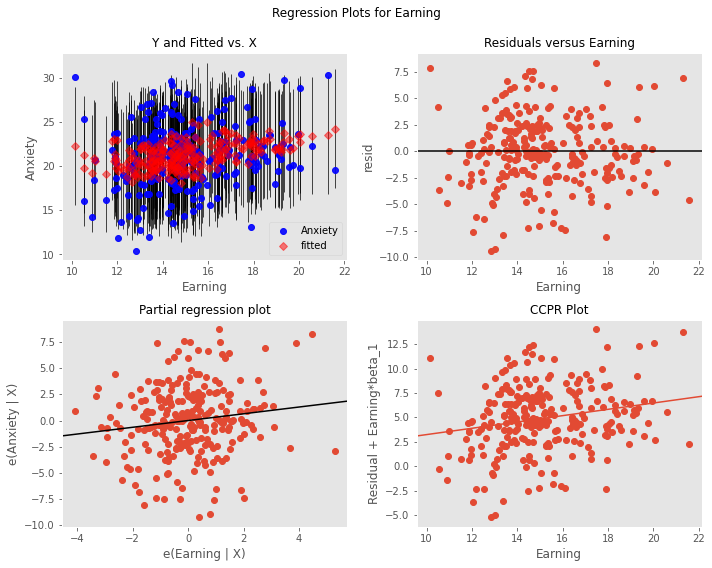

In [152]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multi_regression_model_1, 'Earning', fig=fig)

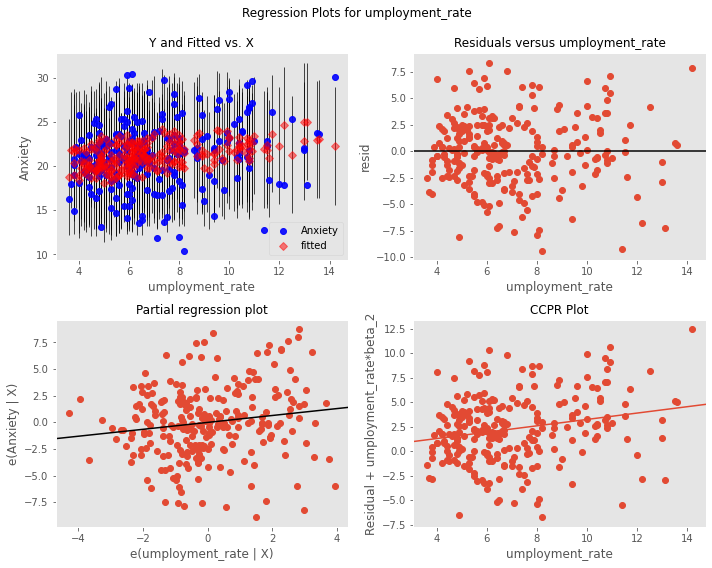

In [153]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multi_regression_model_1, 'umployment_rate', fig=fig)

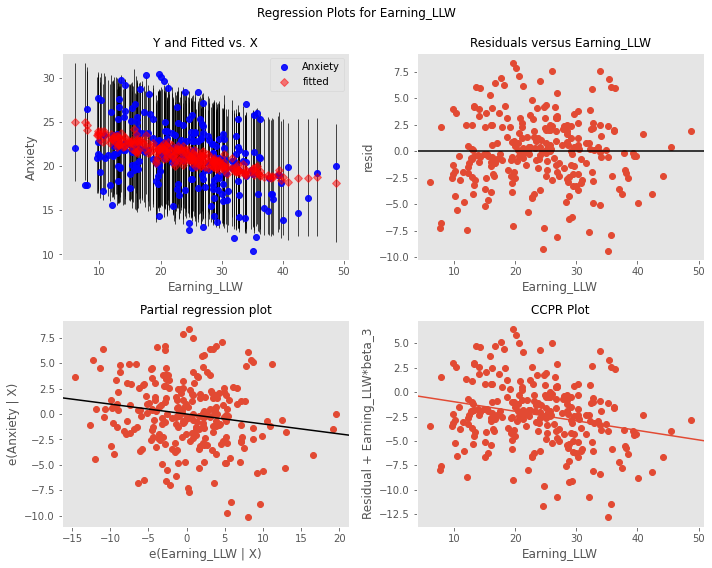

In [154]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multi_regression_model_1, 'Earning_LLW', fig=fig)

In [155]:
d1 = d1.rename(columns = {'Anxiety':'Anxiety',
                         'Icome_support':'Icome_support',
                         'house_afford':'house_afford'})

# This performs a multiple regression of Anxiety against house_afford and Icome_support:对house_afford和Icome_support进行焦虑的多重回归
multi_regression_model_1 = smf.ols(formula='Anxiety ~ house_afford+Icome_support',data=d1).fit()

# And this gives a big summary of the results:
print(multi_regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Anxiety   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     15.24
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           5.61e-07
Time:                        17:21:40   Log-Likelihood:                -676.88
No. Observations:                 256   AIC:                             1360.
Df Residuals:                     253   BIC:                             1370.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.7536      0.965     17.353

In [156]:
# Pick out some values of interest and print the regression equation:

beta_0, beta_1, beta_2 = multi_regression_model_1.params
rsq                    = multi_regression_model_1.rsquared
pval_0, pval_1, pval_2 = multi_regression_model_1.pvalues

print("y =", round(beta_1,3), "x1 +", round(beta_2,3), "x2 +", round(beta_0,3))
print("R^2     = ", rsq)
print("p-value_1 = ", round(pval_1,3))
print("p-value_2 = ", round(pval_2,3))

y = 0.196 x1 + 0.887 x2 + 16.754
R^2     =  0.10755120641265226
p-value_1 =  0.001
p-value_2 =  0.0


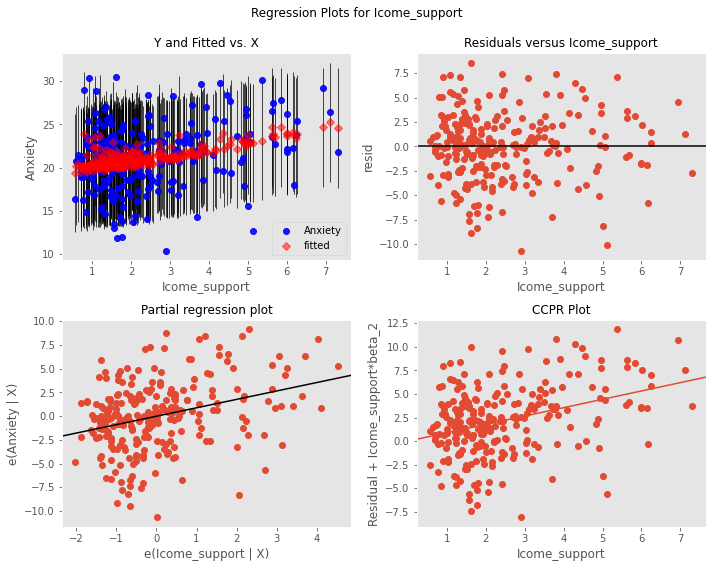

In [157]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multi_regression_model_1, 'Icome_support', fig=fig)

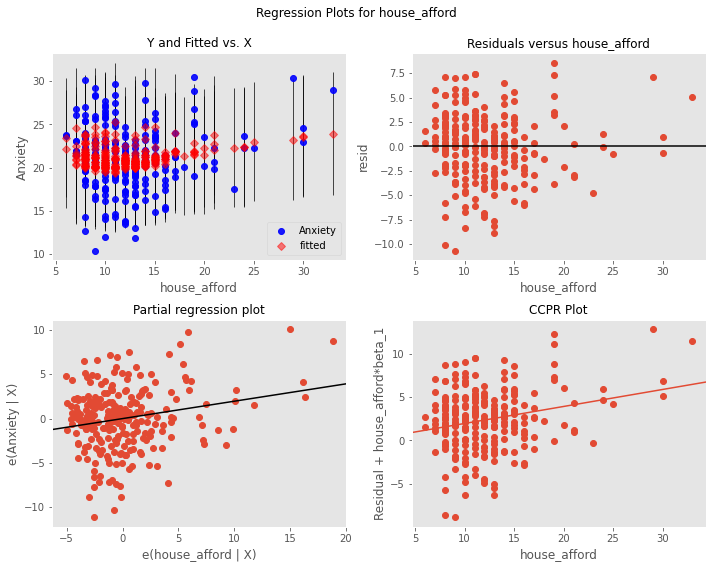

In [158]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multi_regression_model_1, 'house_afford', fig=fig)

# RSquared of simple and multiple regression

In [159]:
# Now let's move on to an alternative version of the same data set:

df2 = pd.read_csv('anxiety_clean.csv')
df2.head()

,Code,Area,Year,Anxiety,Earning,ESA,Icome_support,umployment_rate,house_afford,Earning_LLW,manager_occupation,skill_occupation,service_occupation,elementary_occupation
0,E09000002,Barking and Dagenham,2011,21.8600,11.7500,22.3800,7.3100,13.0000,7,16.1000,3.2000,2.2000,7.0000,4
1,E09000002,Barking and Dagenham,2012,23.8200,11.9800,34.9700,6.2400,13.5000,6,17.0000,9.4000,18.2000,4.0000,14
2,E09000002,Barking and Dagenham,2013,23.7100,11.8400,47.8300,4.7300,13.6000,6,16.2000,9.7000,22.8000,6.2000,14
3,E09000002,Barking and Dagenham,2014,21.0800,11.8800,59.1600,3.6200,10.7000,8,24.1000,12.8000,20.9000,3.9000,8
4,E09000002,Barking and Dagenham,2015,20.7800,11.8900,63.6300,2.9700,9.7000,8,25.0000,6.8000,24.4000,3.8000,15


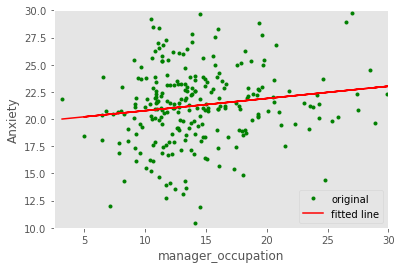

y = 0.113 x + 19.645
Rsq =  0.02571730941436369
p-value =  0.01017113927236027


In [161]:
# This is a regression of well-being against greenery:

X = df2['manager_occupation']
Y = df2['Anxiety']

a = plt.plot(X,Y,'g.',label='original')
plt.xlim(2.5,30)
plt.ylim(10,30)
plt.xlabel('manager_occupation')
plt.ylabel('Anxiety')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label='fitted line') # Plot the regression line.
plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

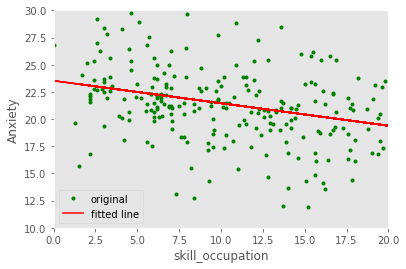

y = -0.207 x + 23.528
Rsq =  0.10770553929909152
p-value =  7.663801423464548e-08


In [162]:
# This is a regression of well-being against natural light:

X = df2['skill_occupation']
Y = df2['Anxiety']

a = plt.plot(X,Y,'g.',label='original')
plt.xlim(0,20)
plt.ylim(10,30)
plt.xlabel('skill_occupation')
plt.ylabel('Anxiety')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label='fitted line') # Plot the regression line.
plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

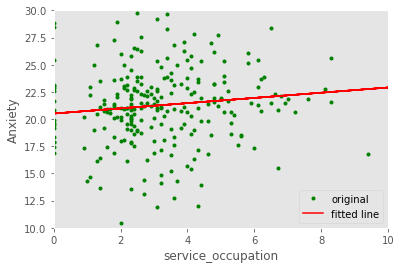

y = 0.24 x + 20.507
Rsq =  0.01637625907614234
p-value =  0.04076471579852169


In [163]:
# This is a regression of well-being against natural light:

X = df2['service_occupation']
Y = df2['Anxiety']

a = plt.plot(X,Y,'g.',label='original')
plt.xlim(0,10)
plt.ylim(10,30)
plt.xlabel('service_occupation')
plt.ylabel('Anxiety')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label='fitted line') # Plot the regression line.
plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

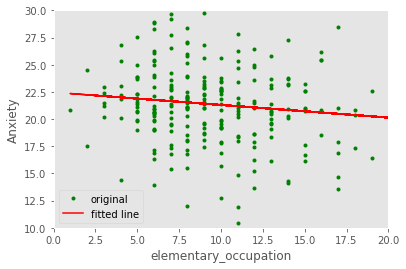

y = -0.116 x + 22.465
Rsq =  0.027008636832617002
p-value =  0.008424702813745558


In [164]:
# This is a regression of well-being against natural light:

X = df2['elementary_occupation']
Y = df2['Anxiety']

a = plt.plot(X,Y,'g.',label='original')
plt.xlim(0,20)
plt.ylim(10,30)
plt.xlabel('elementary_occupation')
plt.ylabel('Anxiety')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label='fitted line') # Plot the regression line.
plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)